# Vizualize Means of Models for Different Contexts
* For all of the metrics
* apply 3 different styles


In [1]:
import os
os.chdir('./data')

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib

import pandas as pd
import seaborn as sns
from glob import glob
from tabulate import tabulate
from IPython.display import Latex, display_html, display, HTML

## Load Results for all Metrics

In [3]:
SIM = pd.read_csv('scores_mean_models_' + 'SIM' + '.csv')
NSS = pd.read_csv('scores_mean_models_' + 'NSS' + '.csv')
AUC = pd.read_csv('scores_mean_models_' + 'AUC' + '.csv')
IG = pd.read_csv('scores_mean_models_' + 'IG' + '.csv')

#### Set Context as Index

In [4]:
SIM.set_index('context', inplace=True)
NSS.set_index('context', inplace=True)
AUC.set_index('context', inplace=True)
IG.set_index('context', inplace=True)

## Vizualization

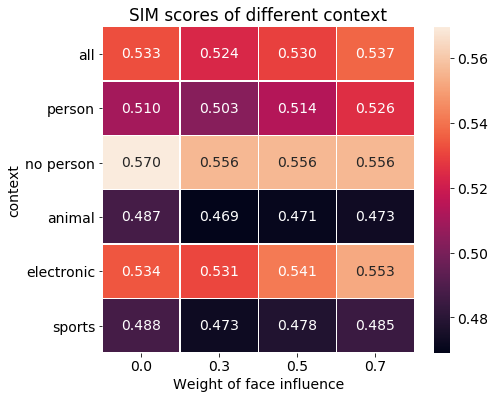

In [5]:
matplotlib.rcParams.update({'font.size': 14})

f, ax = plt.subplots(figsize=(7, 6))

sns.heatmap(SIM, annot=True, linewidths=.5, ax=ax,fmt='.3f');
plt.xlabel('Weight of face influence')
plt.title('{} scores of different context'.format('SIM'));

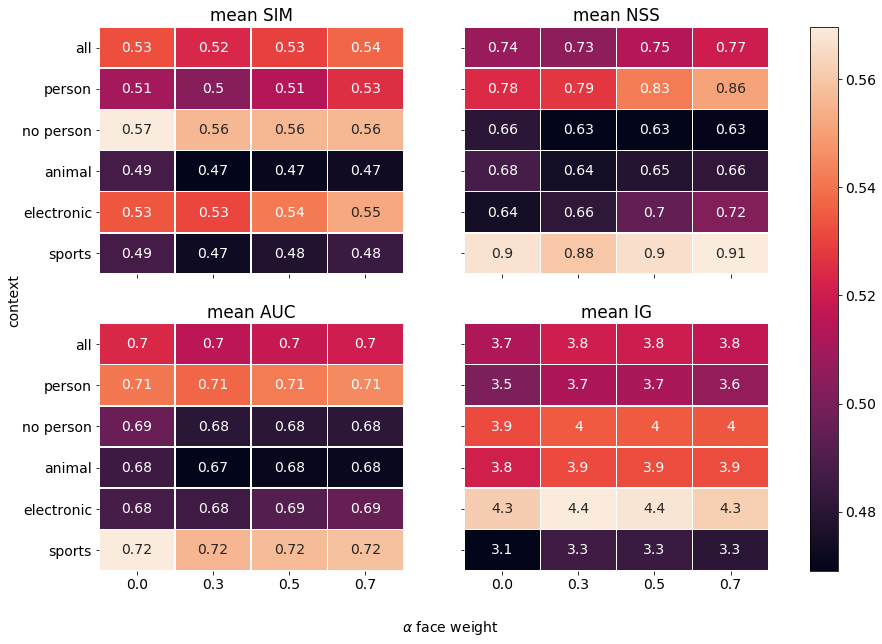

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(15,10), sharex=True, sharey=True)

im = sns.heatmap(SIM, annot=True, linewidths=.5, ax=ax[0][0], cbar=False);
sns.heatmap(NSS, annot=True, linewidths=.5, ax=ax[0][1], cbar=False);
sns.heatmap(AUC, annot=True, linewidths=.5, ax=ax[1][0], cbar=False);
sns.heatmap(IG, annot=True, linewidths=.5, ax=ax[1][1], cbar=False);

mappable = im.get_children()[0]
plt.colorbar(mappable, ax = ax);

ax[0][0].set_title('mean {}'.format('SIM'))
ax[0][1].set_title('mean {}'.format('NSS'))
ax[1][0].set_title('mean {}'.format('AUC'))
ax[1][1].set_title('mean {}'.format('IG'))

ax[0][0].set_ylabel('')
ax[0][1].set_ylabel('')
ax[1][0].set_ylabel('')
ax[1][1].set_ylabel('')

fig.text(0.04, 0.5, 'context', va='center', rotation='vertical')
fig.text(0.45, 0.04, r'$\alpha$ face weight', ha='center');

### Perhaps it's just a matter of changing a colormap?
https://matplotlib.org/gallery/color/colormap_reference.html

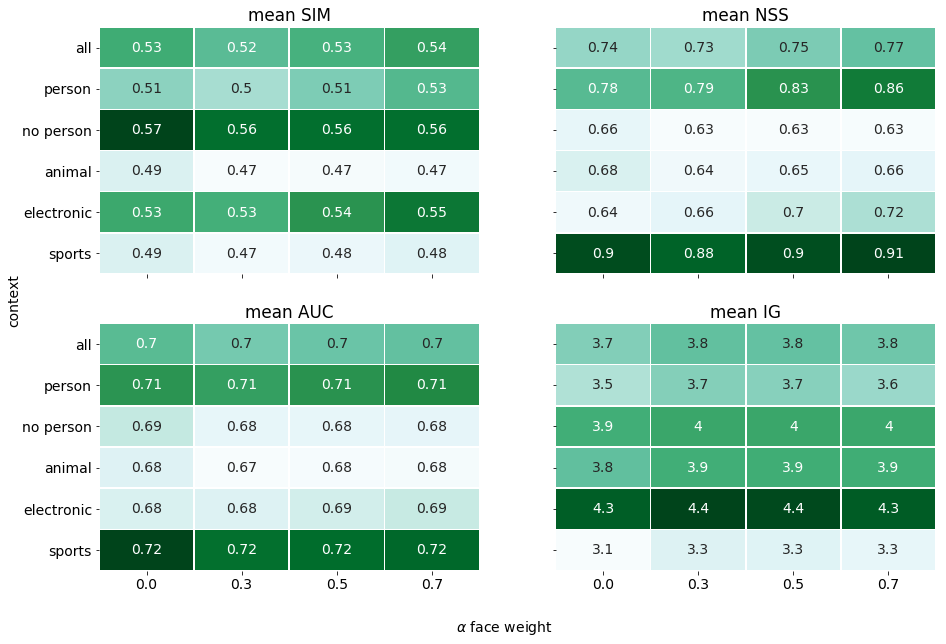

In [7]:
matplotlib.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(2, 2, figsize=(15,10), sharex=True, sharey=True)

im = sns.heatmap(SIM, annot=True, linewidths=.5, ax=ax[0][0], cbar=False, cmap='BuGn');
sns.heatmap(NSS, annot=True, linewidths=.5, ax=ax[0][1], cbar=False, cmap='BuGn');
sns.heatmap(AUC, annot=True, linewidths=.5, ax=ax[1][0], cbar=False, cmap='BuGn');
sns.heatmap(IG, annot=True, linewidths=.5, ax=ax[1][1], cbar=False, cmap='BuGn');

mappable = im.get_children()[0]
# plt.colorbar(mappable, ax = ax);

ax[0][0].set_title('mean {}'.format('SIM'))
ax[0][1].set_title('mean {}'.format('NSS'))
ax[1][0].set_title('mean {}'.format('AUC'))
ax[1][1].set_title('mean {}'.format('IG'))

ax[0][0].set_ylabel('')
ax[0][1].set_ylabel('')
ax[1][0].set_ylabel('')
ax[1][1].set_ylabel('')

fig.text(0.04, 0.5, 'context', va='center', rotation='vertical')
fig.text(0.5, 0.04, r'$\alpha$ face weight', ha='center');

Text(0.5, 0.04, '$\\alpha$ face weight')

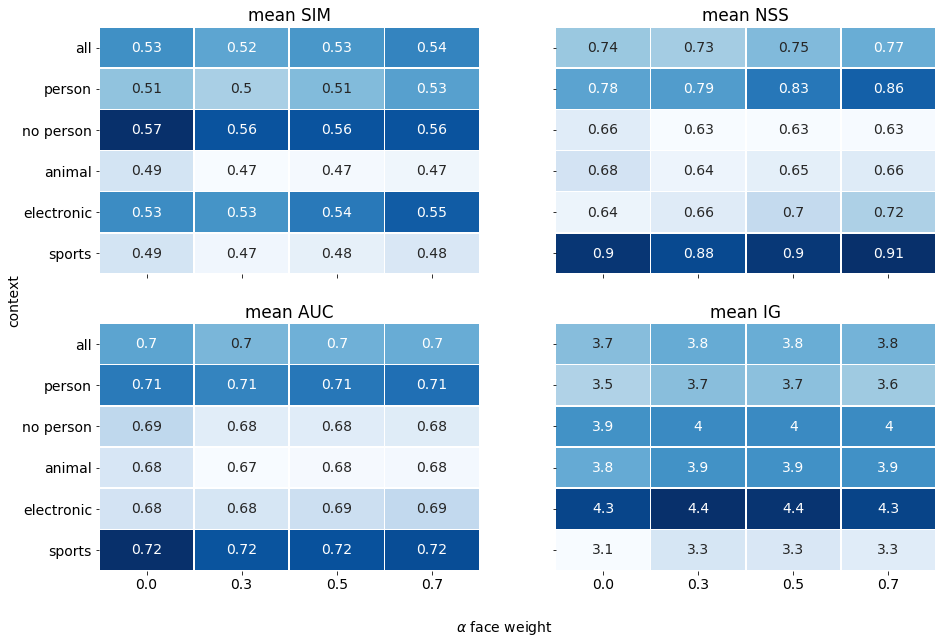

In [8]:
matplotlib.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(2, 2, figsize=(15,10), sharex=True, sharey=True)

im = sns.heatmap(SIM, annot=True, linewidths=.5, ax=ax[0][0], cbar=False, cmap='Blues');
sns.heatmap(NSS, annot=True, linewidths=.5, ax=ax[0][1], cbar=False, cmap='Blues');
sns.heatmap(AUC, annot=True, linewidths=.5, ax=ax[1][0], cbar=False, cmap='Blues');
sns.heatmap(IG, annot=True, linewidths=.5, ax=ax[1][1], cbar=False, cmap='Blues');

mappable = im.get_children()[0]
# plt.colorbar(mappable, ax = ax);

ax[0][0].set_title('mean {}'.format('SIM'))
ax[0][1].set_title('mean {}'.format('NSS'))
ax[1][0].set_title('mean {}'.format('AUC'))
ax[1][1].set_title('mean {}'.format('IG'))

ax[0][0].set_ylabel('')
ax[0][1].set_ylabel('')
ax[1][0].set_ylabel('')
ax[1][1].set_ylabel('')

fig.text(0.04, 0.5, 'context', va='center', rotation='vertical')
fig.text(0.5, 0.04, r'$\alpha$ face weight', ha='center')

### Regular Pandas Print
#### with highest value for each context higlighted

In [9]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['color: red' if v else '' for v in is_max]

In [10]:
sim_styler = SIM.style.apply(highlight_max, axis=1).set_table_attributes("style='display:inline'").set_caption('SIM')
nss_styler = NSS.style.apply(highlight_max, axis=1).set_table_attributes("style='display:inline'").set_caption('NSS')
ig_styler  = IG.style.apply(highlight_max, axis=1).set_table_attributes("style='display:inline'").set_caption('IG')
auc_styler = AUC.style.apply(highlight_max, axis=1).set_table_attributes("style='display:inline'").set_caption('AUC')

display_html(
    nss_styler._repr_html_() +
    sim_styler._repr_html_() +
    auc_styler._repr_html_()  +
    ig_styler._repr_html_(), raw=True)

,0.0,0.3,0.5,0.7
context,,,,
all,0.735362,0.728069,0.753863,0.769762
person,0.782783,0.790905,0.832052,0.857653
no person,0.65849,0.626122,0.627114,0.627286
animal,0.679078,0.641684,0.653673,0.661891
electronic,0.642371,0.661047,0.698956,0.719648
sports,0.903448,0.883468,0.901479,0.910687
,0.0,0.3,0.5,0.7
context,,,,
all,0.532737,0.523516,0.529964,0.537261


In [11]:
SIM.style.apply(highlight_max, axis=1)

,0.0,0.3,0.5,0.7
context,,,,
all,0.532737,0.523516,0.529964,0.537261
person,0.509961,0.503443,0.513851,0.525574
no person,0.569657,0.556082,0.556085,0.556207
animal,0.487417,0.469114,0.470884,0.473194
electronic,0.534156,0.530928,0.541387,0.552662
sports,0.487515,0.472905,0.47807,0.484681


In [12]:
NSS.style.apply(highlight_max, axis=1)

,0.0,0.3,0.5,0.7
context,,,,
all,0.735362,0.728069,0.753863,0.769762
person,0.782783,0.790905,0.832052,0.857653
no person,0.65849,0.626122,0.627114,0.627286
animal,0.679078,0.641684,0.653673,0.661891
electronic,0.642371,0.661047,0.698956,0.719648
sports,0.903448,0.883468,0.901479,0.910687


In [13]:
AUC.style.apply(highlight_max, axis=1)

,0.0,0.3,0.5,0.7
context,,,,
all,0.701773,0.69761,0.699069,0.700077
person,0.710203,0.708264,0.710575,0.712104
no person,0.688107,0.680321,0.680416,0.68058
animal,0.682807,0.674728,0.675339,0.675816
electronic,0.684005,0.683037,0.68566,0.687727
sports,0.724303,0.717384,0.718032,0.718847


In [14]:
IG.style.apply(highlight_max, axis=1)

,0.0,0.3,0.5,0.7
context,,,,
all,3.69646,3.80279,3.79314,3.7545
person,3.54456,3.68974,3.67683,3.61735
no person,3.9427,3.98617,3.98168,3.97684
animal,3.80437,3.9411,3.94711,3.94824
electronic,4.32773,4.43393,4.40937,4.33448
sports,3.13221,3.34649,3.33103,3.2802


## Tables

In [15]:
print(tabulate(SIM, tablefmt="pipe", headers="keys"))

| context    |      0.0 |      0.3 |      0.5 |      0.7 |
|:-----------|---------:|---------:|---------:|---------:|
| all        | 0.532737 | 0.523516 | 0.529964 | 0.537261 |
| person     | 0.509961 | 0.503443 | 0.513851 | 0.525574 |
| no person  | 0.569657 | 0.556082 | 0.556085 | 0.556207 |
| animal     | 0.487417 | 0.469114 | 0.470884 | 0.473194 |
| electronic | 0.534156 | 0.530928 | 0.541387 | 0.552662 |
| sports     | 0.487515 | 0.472905 | 0.47807  | 0.484681 |
